#Problem Statement

A bank wants to segment its customers into different groups based on their
spending habits and demographics. This will help the bank to target marketing campaigns more
effectively and to understand how to better serve its customers

#Solution

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv("bank.csv")

In [11]:
print(df.head(3))
print('----------')
print('Shape: ' ,df.shape)
print('----------')
print(df.dtypes)
print('----------')
print(df.describe())
print('----------')
print('Data Null?')
print(df.isnull().sum())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
----------
Shape:  (11162, 17)
----------
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object
---

##Data Visualization

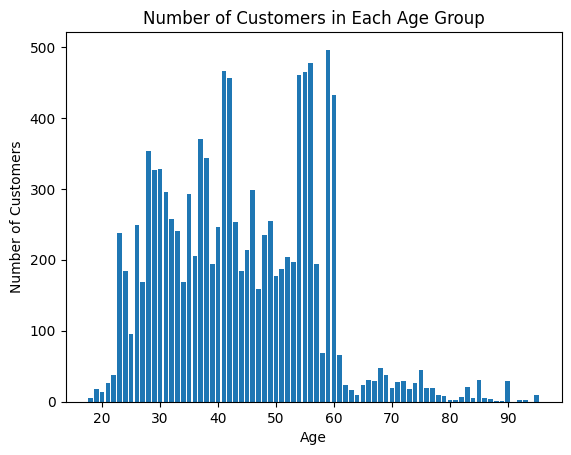

In [14]:
plt.bar(df["age"].unique(), df["age"].value_counts())
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in Each Age Group")
plt.show()

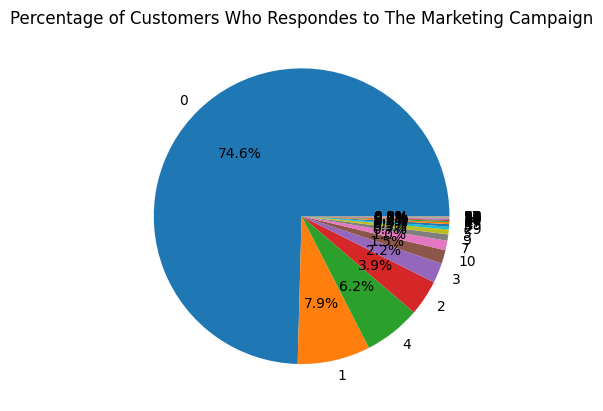

In [15]:
plt.pie(df["previous"].value_counts(), labels=df["previous"].unique(), autopct='%1.1f%%')
plt.title("Percentage of Customers Who Respondes to The Marketing Campaign")
plt.show()

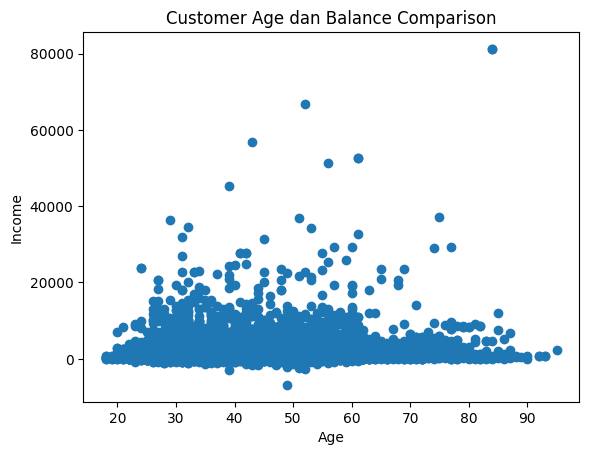

In [18]:
plt.scatter(df["age"], df["balance"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customer Age dan Balance Comparison")
plt.show()

##Create Model

In [19]:
attributes = ["balance", "age", "campaign"]

In [20]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[attributes])
labels = kmeans.predict(df[attributes])

##Cluster Visualization

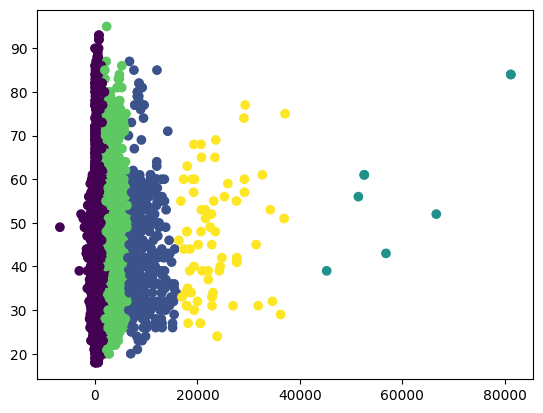

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df["balance"], df['age'], c=labels)
plt.show()

#Insight Extraction

In [23]:
correlation = data[['age','balance','day','duration','campaign','pdays','previous']].corr()

In [27]:
most_correlated_features = correlation['previous'].nlargest(5)

print("The features that are most strongly correlated with customer subscription are:")
print(most_correlated_features)

The features that are most strongly correlated with customer subscription are:
previous    1.000000
pdays       0.507272
balance     0.030805
age         0.020169
duration   -0.026716
Name: previous, dtype: float64


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
